#Q3_1

In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# https://drive.google.com/file/d/1lZOjX6bOfI9PYv8l1exXiYHKUp6eM760/view?usp=sharing
!gdown 1lZOjX6bOfI9PYv8l1exXiYHKUp6eM760

Downloading...
From: https://drive.google.com/uc?id=1lZOjX6bOfI9PYv8l1exXiYHKUp6eM760
To: /content/weatherHistory.csv
100% 16.3M/16.3M [00:00<00:00, 121MB/s] 


In [4]:
w = pd.read_csv('/content/weatherHistory.csv')

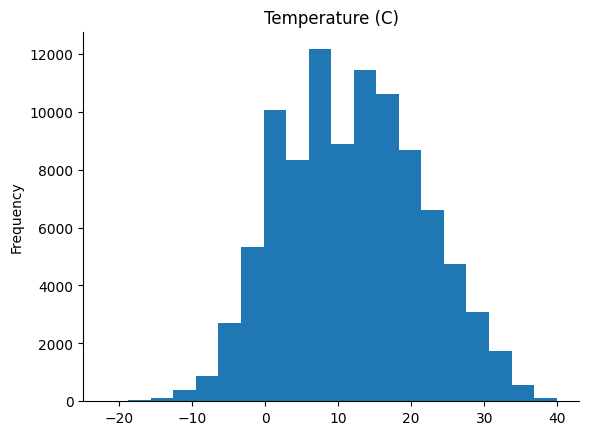

In [ ]:
from matplotlib import pyplot as plt
w['Temperature (C)'].plot(kind='hist', bins=20, title='Temperature (C)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('h Temperture')

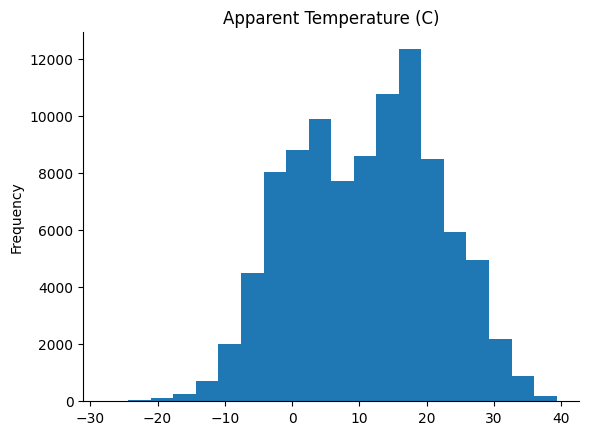

In [ ]:
w['Apparent Temperature (C)'].plot(kind='hist', bins=20, title='Apparent Temperature (C)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('h Apparent Temperature (C)')

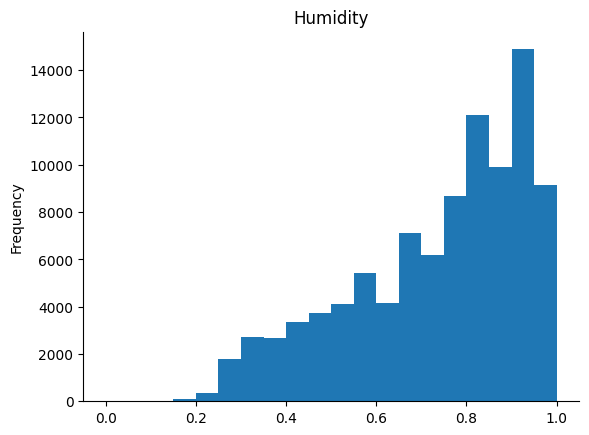

In [ ]:
w['Humidity'].plot(kind='hist', bins=20, title='Humidity')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('h Humidity')

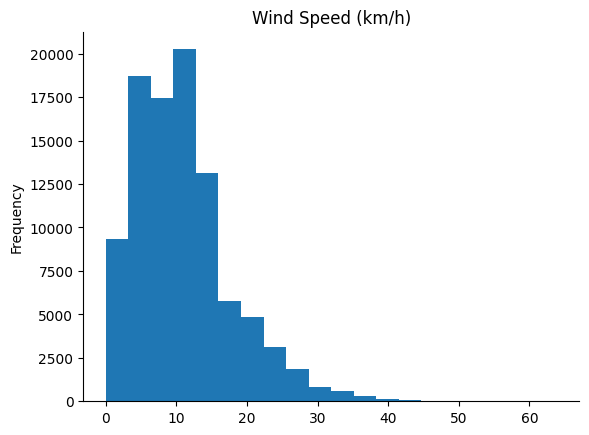

In [ ]:
w['Wind Speed (km/h)'].plot(kind='hist', bins=20, title='Wind Speed (km/h)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('h Wind Speed')

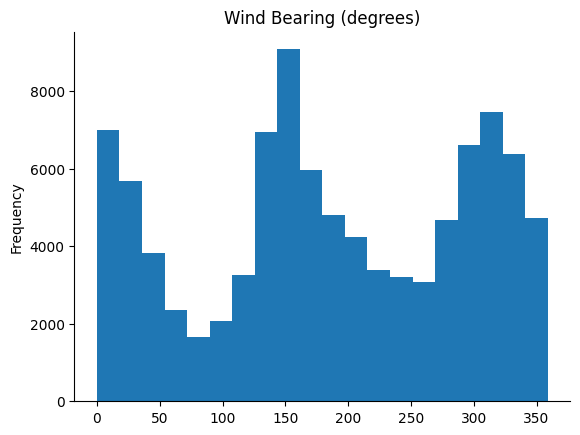

In [ ]:
w['Wind Bearing (degrees)'].plot(kind='hist', bins=20, title='Wind Bearing (degrees)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('h Wind Bearing (degrees)')

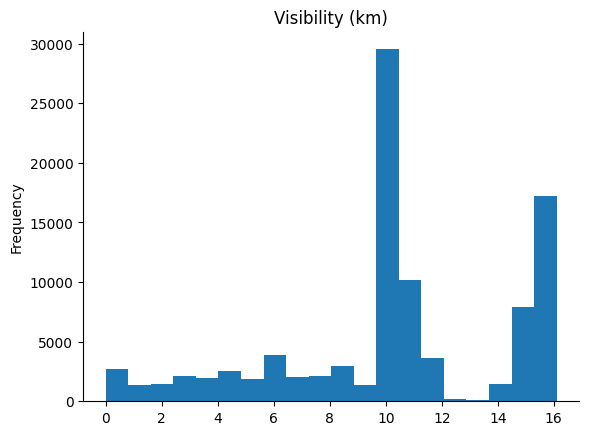

In [ ]:
w['Visibility (km)'].plot(kind='hist', bins=20, title='Visibility (km)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('h Visibility (km)')

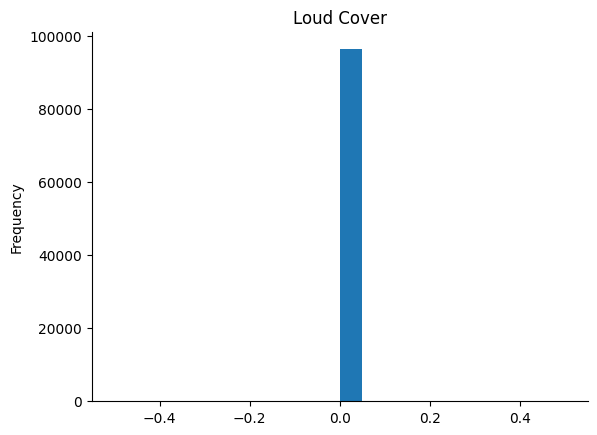

In [4]:
w['Loud Cover'].plot(kind='hist', bins=20, title='Loud Cover')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('h Loud Cover.png')

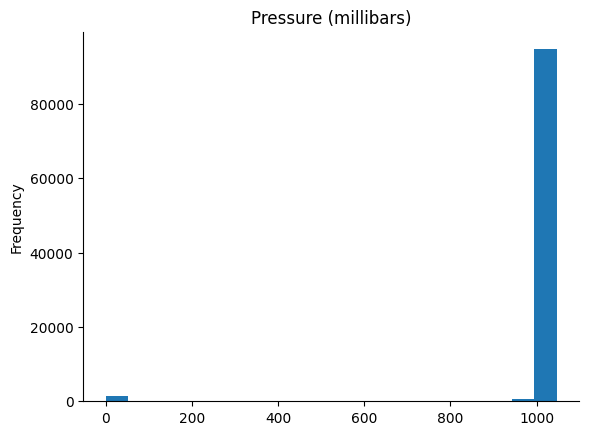

In [15]:
w['Pressure (millibars)'].plot(kind='hist', bins=20, title='Pressure (millibars)')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.savefig('h Pressure (millibars)')

In [7]:
w_np = np.array(w)
nw = pd.DataFrame(w_np[: , 3:11])

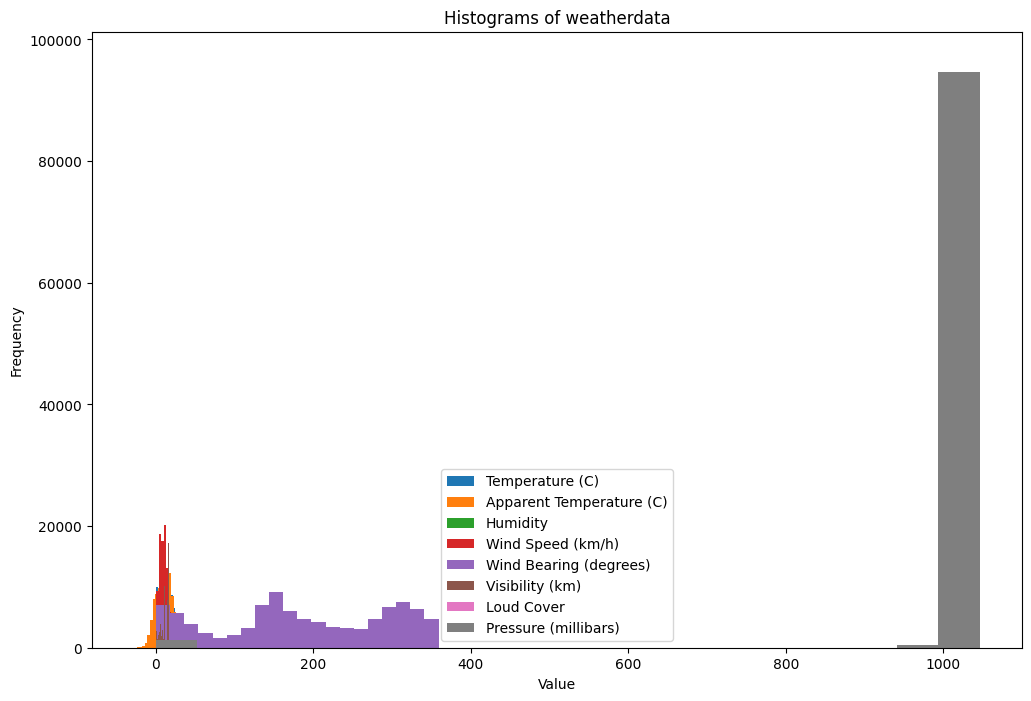

In [16]:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
for column in nw.columns:
    plt.hist(nw[column], bins=20, alpha=1, label=column)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of weatherdata')
plt.legend(['Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)','Loud Cover','Pressure (millibars)'])
plt.savefig('Histogram ')
plt.show()

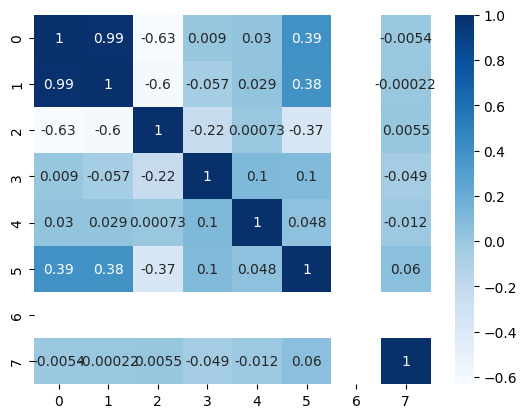

<Figure size 640x480 with 0 Axes>

In [11]:
correlation_matrix = nw.corr()

axis_corr = sns.heatmap(correlation_matrix ,annot=True, cmap = 'Blues')

plt.show()
plt.savefig('heatmap.png')

#Q3_2

***LS***

In [ ]:
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

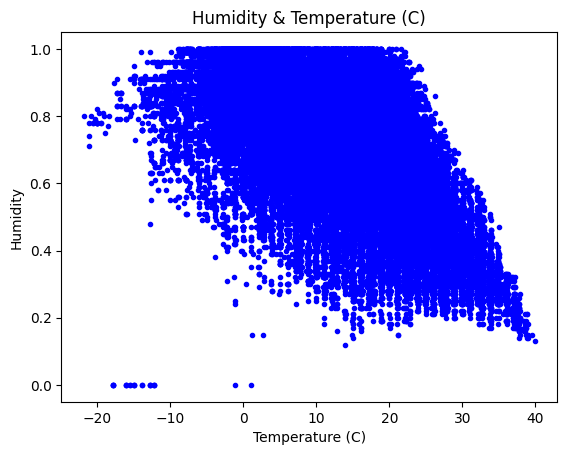

In [ ]:
plt.scatter(w["Temperature (C)"],w["Humidity"],color='b',marker='.')
plt.title('Humidity & Temperature (C)')
plt.ylabel('Humidity')
plt.xlabel('Temperature (C)')
plt.grid(False)

In [ ]:
mod=sm.ols(formula='w["Humidity"]~w["Temperature (C)"]',data=w)
res=mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          w["Humidity"]   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                 6.423e+04
Date:                Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                        10:10:01   Log-Likelihood:                 45198.
No. Observations:               96453   AIC:                        -9.039e+04
Df Residuals:                   96451   BIC:                        -9.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8893 

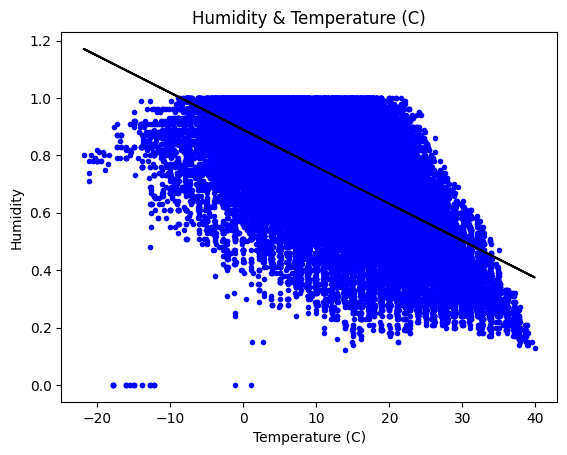

In [ ]:
plt.scatter(w["Temperature (C)"],w["Humidity"],color='b',marker='.')
plt.plot(w["Temperature (C)"], 0.8893-0.0129*w["Temperature (C)"],color='black')
plt.title('Humidity & Temperature (C)')
plt.ylabel('Humidity')
plt.xlabel('Temperature (C)')
plt.grid(False)

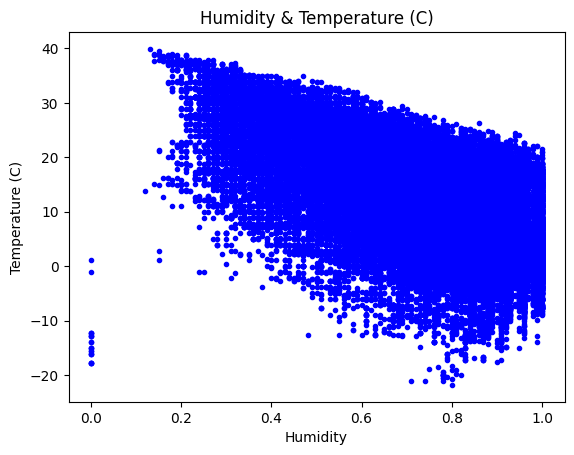

In [ ]:
plt.scatter(w["Humidity"],w["Temperature (C)"],color='b',marker='.')
plt.title('Humidity & Temperature (C)')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.grid(False)

In [ ]:
mod=sm.ols(formula='w["Temperature (C)"]~w["Humidity"]',data=w)
res=mod.fit()
print(res.summary())

                             OLS Regression Results                             
Dep. Variable:     w["Temperature (C)"]   R-squared:                       0.400
Model:                              OLS   Adj. R-squared:                  0.400
Method:                   Least Squares   F-statistic:                 6.423e+04
Date:                  Tue, 02 Apr 2024   Prob (F-statistic):               0.00
Time:                          10:39:06   Log-Likelihood:            -3.2991e+05
No. Observations:                 96453   AIC:                         6.598e+05
Df Residuals:                     96451   BIC:                         6.598e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        34.6369  

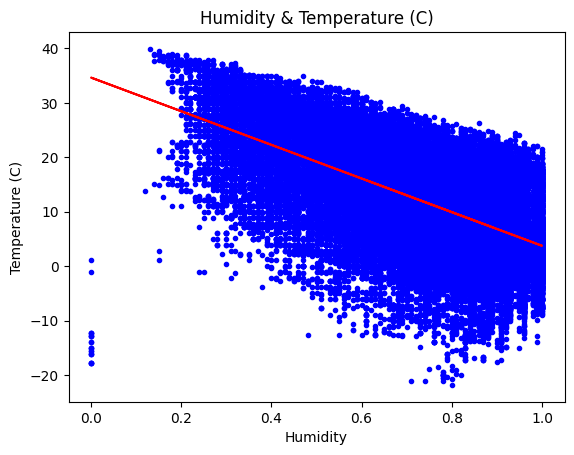

In [ ]:
plt.scatter(w["Humidity"],w["Temperature (C)"],color='b',marker='.')
plt.plot(w["Humidity"], 34.6369-30.8944*w["Humidity"],color='red')
plt.title('Humidity & Temperature (C)')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.grid(False)


In [36]:
class LinearRegressionLS:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Compute the coefficients using the least squares method
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to account for the intercept term
        X = np.column_stack((np.ones(len(X)), X))

        # Predict the target variable
        return X.dot(self.coefficients)

In [44]:
y1 = w['Temperature (C)']
X1 = w['Humidity']

model = LinearRegressionLS()
model.fit(X1, y1)
y_pred1 = model.predict(X1)

def mse(x_trai,y_test):
  m = np.mean((y_test- model.predict(X1))**2)
  print("Mean Squared Error:", m)
mse(X1,y1)

Mean Squared Error: 54.761829807719856


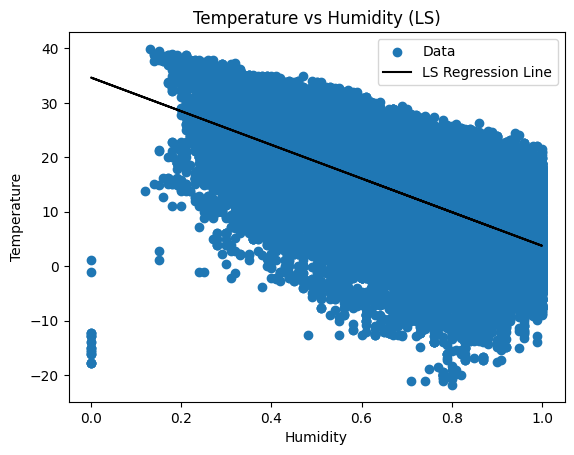

In [49]:
plt.scatter(X1, y1, label='Data')
plt.plot(X1, y_pred1, color='black', label='LS Regression Line')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Temperature vs Humidity (LS)')
plt.legend()
plt.savefig('LS.png')
plt.show()

***RLS***

Mean Squared Error: 134.02601813760666


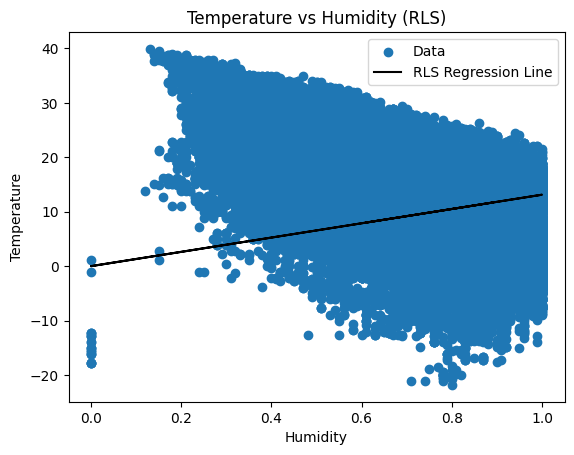

In [48]:
from sklearn.linear_model import SGDRegressor


class RecursiveLeastSquares:
    def __init__(self, n_features, forgetting_factor=1.0):
        self.n_features = n_features
        self.forgetting_factor = forgetting_factor
        self.theta = np.zeros((n_features, 1))
        self.P = np.eye(n_features)

    def update(self, x, y):
        x = np.atleast_2d(x)
        y = np.atleast_1d(y)


        err = y - np.dot(x, self.theta)


        K = np.dot(self.P, x.T) / (self.forgetting_factor + np.dot(np.dot(x, self.P), x.T))


        self.theta += np.dot(K, err)
        self.P = (1 / self.forgetting_factor) * (self.P - np.dot(K, np.dot(x, self.P)))

    def error(self , x , y):
        x = np.atleast_2d(x)
        y = np.atleast_1d(y)


        err = y - np.dot(x, self.theta)
        return err
    def predict(self, x):
        x = np.atleast_2d(x)
        return np.dot(x, self.theta)

import pandas as pd
import matplotlib.pyplot as plt

X = w['Humidity'].values.reshape(-1, 1)
y = w['Temperature (C)'].values

model = RecursiveLeastSquares(n_features=1)
err_list = []

for i in range(len(X)):
    model.update(X[i], y[i])
    err_list.append(model.error(X[i] , y[i]))



y_pred = [model.predict(x)[0, 0] for x in X]


mse = np.mean(np.array(err_list)**2)
print("Mean Squared Error:", mse)
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='black', label='RLS Regression Line')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Temperature vs Humidity (RLS)')
plt.legend()
plt.savefig('RLS.png')
plt.show()

#Q3_3

***WLS***

Mean Squared Error: 134.06284853018997


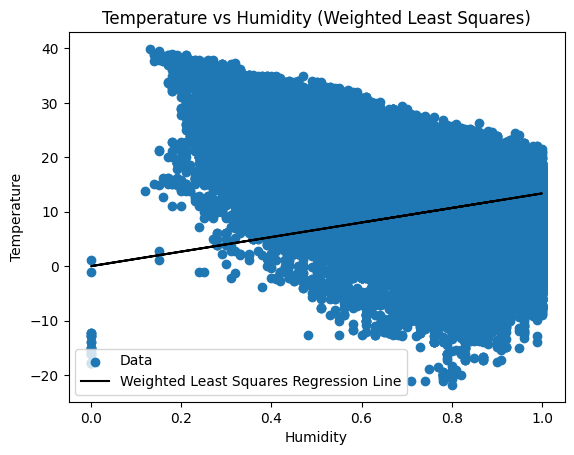

In [50]:
import numpy as np
import matplotlib.pyplot as plt
X = w['Humidity'].values.reshape(-1, 1)
y = w['Temperature (C)'].values

weights = np.linspace(0.1, 1, len(y))


W = np.diag(weights)
X_weighted = np.dot(W, X)
y_weighted = np.dot(W, y)
coefficients = np.linalg.inv(X_weighted.T.dot(X_weighted)).dot(X_weighted.T).dot(y_weighted)


y_pred = X.dot(coefficients)
mse = np.mean((y - y_pred)**2)
print("Mean Squared Error:", mse)

plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='k', label='Weighted Least Squares Regression Line')
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Temperature vs Humidity (Weighted Least Squares)')
plt.legend()
plt.show()

